## Car Price Prediction With Machine Learning
**kaggle data set**

In [86]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [83]:
data=pd.read_csv(r"C:\Users\Amaya Kadam\Desktop\datascience\car data.csv")
data

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [5]:
data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
data.keys()

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [7]:
data.shape

(301, 9)

### Data cleaning

In [8]:
data.duplicated().sum()

2

In [9]:
data.drop_duplicates(inplace=True)
data.shape

(299, 9)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       299 non-null    object 
 1   Year           299 non-null    int64  
 2   Selling_Price  299 non-null    float64
 3   Present_Price  299 non-null    float64
 4   Driven_kms     299 non-null    int64  
 5   Fuel_Type      299 non-null    object 
 6   Selling_type   299 non-null    object 
 7   Transmission   299 non-null    object 
 8   Owner          299 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 23.4+ KB


In [11]:
for field in data.columns:
    print('unique value'+ field)
    print(data[field].unique())

unique valueCar_Name
['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'Bajaj Avenger Str

In [12]:
data['Car_Name'].nunique()

98

### Preparing for modeling
**Encoding**

In [34]:
car_name=data['Car_Name'].unique()
car_names=car_name.tolist()

In [35]:
car_name_to_number = {(car_names):i for i, car_names in enumerate(car_names,start=1)}

In [36]:
car_name_to_number

{'ritz': 1,
 'sx4': 2,
 'ciaz': 3,
 'wagon r': 4,
 'swift': 5,
 'vitara brezza': 6,
 's cross': 7,
 'alto 800': 8,
 'ertiga': 9,
 'dzire': 10,
 'alto k10': 11,
 'ignis': 12,
 '800': 13,
 'baleno': 14,
 'omni': 15,
 'fortuner': 16,
 'innova': 17,
 'corolla altis': 18,
 'etios cross': 19,
 'etios g': 20,
 'etios liva': 21,
 'corolla': 22,
 'etios gd': 23,
 'camry': 24,
 'land cruiser': 25,
 'Royal Enfield Thunder 500': 26,
 'UM Renegade Mojave': 27,
 'KTM RC200': 28,
 'Bajaj Dominar 400': 29,
 'Royal Enfield Classic 350': 30,
 'KTM RC390': 31,
 'Hyosung GT250R': 32,
 'Royal Enfield Thunder 350': 33,
 'KTM 390 Duke ': 34,
 'Mahindra Mojo XT300': 35,
 'Bajaj Pulsar RS200': 36,
 'Royal Enfield Bullet 350': 37,
 'Royal Enfield Classic 500': 38,
 'Bajaj Avenger 220': 39,
 'Bajaj Avenger 150': 40,
 'Honda CB Hornet 160R': 41,
 'Yamaha FZ S V 2.0': 42,
 'Yamaha FZ 16': 43,
 'TVS Apache RTR 160': 44,
 'Bajaj Pulsar 150': 45,
 'Honda CBR 150': 46,
 'Hero Extreme': 47,
 'Bajaj Avenger 220 dtsi': 4

In [37]:
data_car=data.copy()
data_car['Car_Name'] =data_car['Car_Name'].map(car_name_to_number)

In [38]:
data_car

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,1,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,3,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,4,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,5,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,95,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,96,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,95,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,95,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [39]:
data_car.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
data_car.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)
data_car.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)
data_car.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,1,2014,3.35,5.59,27000,0,0,0,0
1,2,2013,4.75,9.54,43000,1,0,0,0
2,3,2017,7.25,9.85,6900,0,0,0,0
3,4,2011,2.85,4.15,5200,0,0,0,0
4,5,2014,4.60,6.87,42450,1,0,0,0


## Finding Outliers

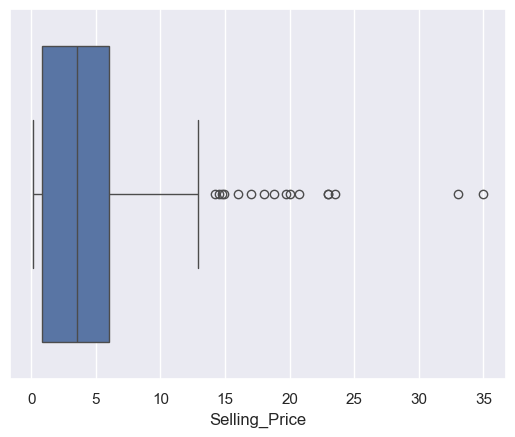

In [40]:
sns.set()
sns.boxplot(data_car['Selling_Price'],orient='h')
plt.show()

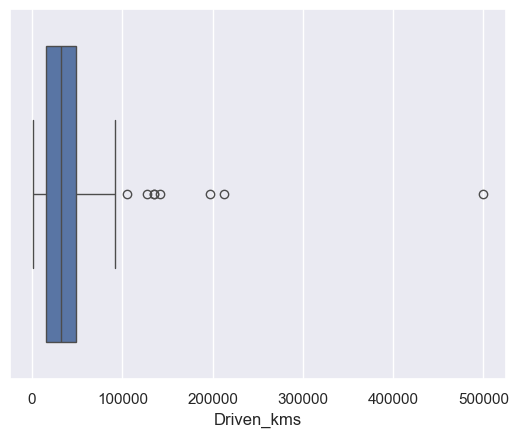

In [41]:
sns.boxplot(data_car['Driven_kms'],orient='h')
plt.show()

**This is an Outlier**

In [42]:
data[data_car['Driven_kms']>400000]

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
196,Activa 3g,2008,0.17,0.52,500000,Petrol,Individual,Automatic,0


In [43]:
data_new=data_car[~(data_car['Driven_kms']>400000)]

In [44]:
data_new.shape

(298, 9)

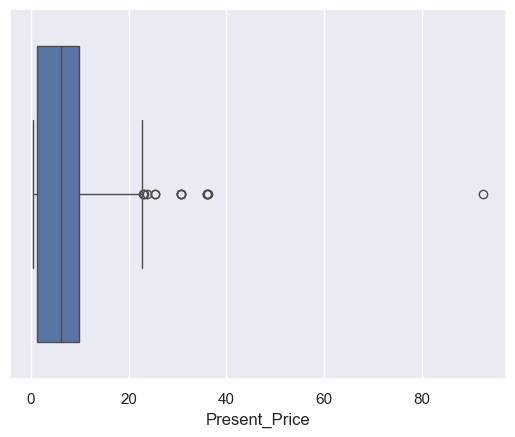

In [45]:
sns.boxplot(data['Present_Price'],orient='h')
plt.show()

**Not an Outlier**

In [46]:
data[data_car['Present_Price']>80]

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
86,land cruiser,2010,35.0,92.6,78000,Diesel,Dealer,Manual,0


In [47]:
data_new.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,1,2014,3.35,5.59,27000,0,0,0,0
1,2,2013,4.75,9.54,43000,1,0,0,0
2,3,2017,7.25,9.85,6900,0,0,0,0
3,4,2011,2.85,4.15,5200,0,0,0,0
4,5,2014,4.60,6.87,42450,1,0,0,0


## Exploratory Data Analysis

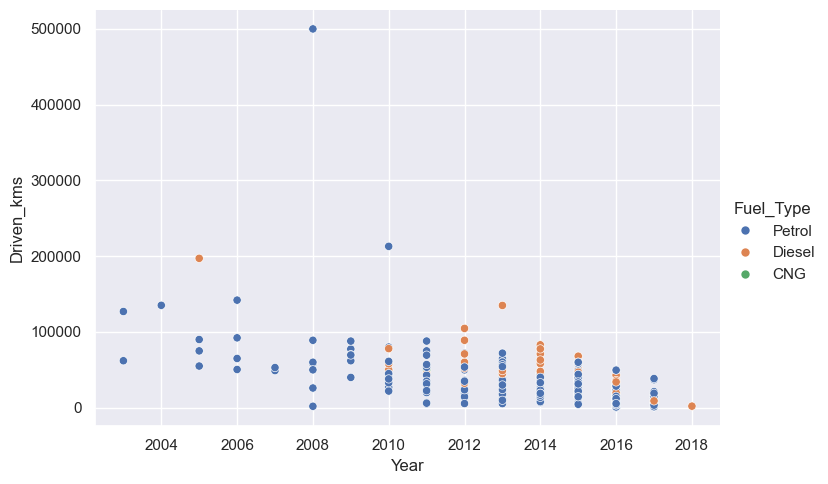

In [48]:
sns.set()
sns.relplot(x ="Year", y ="Driven_kms", data = data ,hue="Fuel_Type", height=5, aspect=1.5)
sns.set_palette("husl")

In [49]:
car_transmission=data[['Car_Name','Transmission']].groupby('Transmission').count()
car_transmission

,Car_Name
Transmission,
Automatic,39
Manual,260


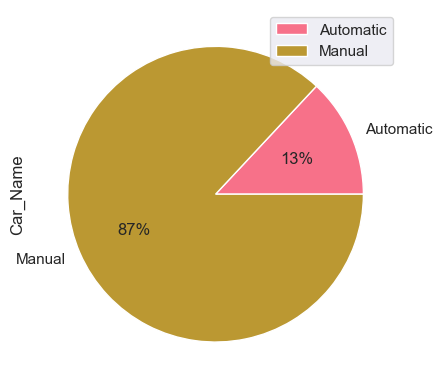

In [50]:
car_transmission.plot(kind='pie', y='Car_Name',autopct='%1.0f%%')
plt.show()

In [51]:
car_Fueltype=data[['Car_Name','Fuel_Type']].groupby('Fuel_Type').count()
car_Fueltype

,Car_Name
Fuel_Type,
CNG,2
Diesel,58
Petrol,239


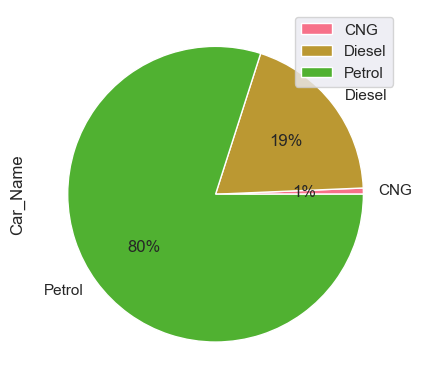

In [52]:
car_Fueltype.plot(kind='pie', y='Car_Name',autopct='%1.0f%%')
plt.show()

In [53]:
car_dealer=data[['Car_Name','Selling_type']].groupby('Selling_type').count()
car_dealer

,Car_Name
Selling_type,
Dealer,193
Individual,106


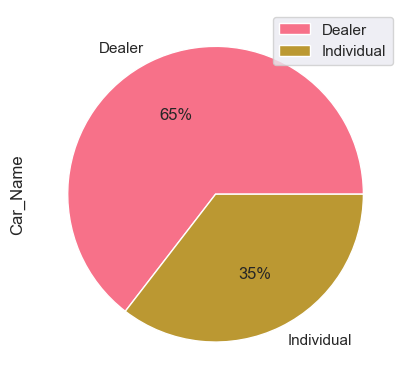

In [54]:
car_dealer.plot(kind='pie', y='Car_Name',autopct='%1.0f%%')
plt.show()

In [55]:
car_year=data[['Car_Name','Year']].groupby('Year').count()
car_year

,Car_Name
Year,
2003,2
2004,1
2005,4
2006,4
2007,2
2008,7
2009,6
2010,15
2011,19


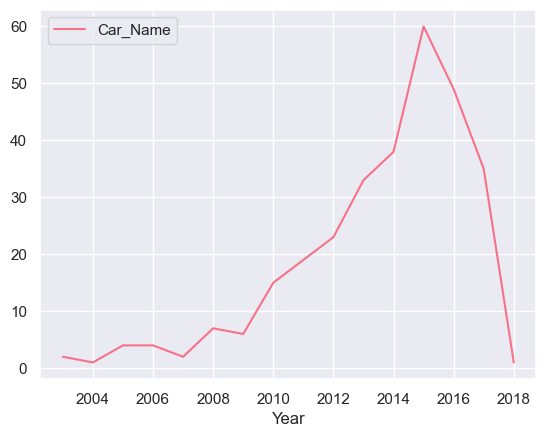

In [56]:
car_year.plot()
plt.show()

In [76]:
input_data=data_new.drop(columns=['Selling_Price']).values
output_data=data_new['Selling_Price'].values

## Train test spilt

In [77]:
input_train,input_test,output_train,output_test=train_test_split(input_data, output_data, test_size=0.1)

In [78]:
input_train.shape,input_test.shape

((268, 8), (30, 8))

## Model Training 

In [81]:
ln=LinearRegression()
ln.fit(input_train,output_train)
rf=RandomForestRegressor()
rf.fit(input_train,output_train)

RandomForestRegressor()

In [85]:
pred_1=ln.predict(input_test)
pred_2=rf.predict(input_test)

In [93]:
print('Accuracy of linear regression = ',metrics.r2_score(output_test,pred_1)*100 ,'%')
print('Accuracy of random forest regression = ',metrics.r2_score(output_test,pred_2)*100 ,'%')

Accuracy of linear regression =  85.36714522892632 %
Accuracy of random forest regression =  89.6080724637026 %


### With Cross Validation

In [120]:
a=cross_val_score(ln,input_data,output_data, cv=4)
cross_val_score(ln,input_data,output_data, cv=4)

array([0.80651183, 0.70387182, 0.4561373 , 0.83360188])

In [121]:
print('Accuracy of linear regression with cross validation = ',a)

Accuracy of linear regression with cross validation =  [0.80651183 0.70387182 0.4561373  0.83360188]


In [122]:
b=cross_val_score(rf,input_data,output_data, cv=4)
cross_val_score(rf,input_data,output_data, cv=4)

array([0.87449308, 0.75244845, 0.97556997, 0.86704569])

In [123]:
print('Accuracy of linear regression with cross validation = ',b)

Accuracy of linear regression with cross validation =  [0.87456424 0.77074486 0.97605789 0.86667693]
